In [31]:
import json
import pandas as pd
import math
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
df = pd.read_csv('../feature_distribution.json')

In [5]:
df.head()

,"{""OpSet3_119_mean"": 95.833333333333329","""SensorMeasure13_264_mean"": 2350.8182352941162","""SensorMeasure14_370_std"": 101.23032619042957","""SensorMeasure11_158_std"": 3.2072908642564291","""SensorMeasure13_311_std"": 107.57514280562484","""SensorMeasure16_69_std"": 0.0050016258888719474","""SensorMeasure4_181_std"": 136.51730626576312","""SensorMeasure2_91_mean"": 597.79624797406859","""SensorMeasure10_437_std"": 0.14424427287213257","""SensorMeasure21_261_std"": 6.8287694119558475",...,"""OpSet3_206_mean"": 95.060728744939269","""SensorMeasure9_184_mean"": 8683.0764714086399","""SensorMeasure15_46_mean"": 9.0454104151493162","""SensorMeasure8_272_mean"": 2279.1456632653058","""SensorMeasure17_377_std"": 32.932270704910593","""SensorMeasure3_318_std"": 118.42759610446245","""SensorMeasure18_527_std"": 10","""OpSet2_394_std"": 0.38834012798061446","""SensorMeasure21_158_mean"": 15.229254487179491","""SensorMeasure9_132_std"": 364.38705270445024}"


In [13]:
def load_data():
    ''' Takes Data from all csv files from CMAPPS dataset and loads into a dataframe'''

    allFiles = ["../data/CMAPSSData/train_FD001.txt", "../data/CMAPSSData/train_FD002.txt", "../data/CMAPSSData/train_FD003.txt", "../data/CMAPSSData/train_FD004.txt", \
            "../data/CMAPSSData/test_FD001.txt", "../data/CMAPSSData/test_FD002.txt", "../data/CMAPSSData/test_FD003.txt", "../data/CMAPSSData/test_FD004.txt"]
    file_suffixes = ["_train_FD001", "_train_FD002", "_train_FD003", "_train_FD004", "_test_FD001", "_test_FD002", \
               "_test_FD003", "_test_FD004"]
    all_dfs = []
    for i in xrange(len(allFiles)):
        temp_df = pd.read_csv(allFiles[i], header=None, sep = ' ', index_col=False)
        temp_df[0] =  temp_df[0].astype(str) + file_suffixes[i]
        all_dfs.append(temp_df)

    df = pd.concat(all_dfs, ignore_index=True)

    #changing column names to make them more human readable
    col_names = ["unit", "time", "OpSet1", "OpSet2", "OpSet3"]
    for i in xrange(1,24):
        col_names.append("SensorMeasure" + str(i))
    df.columns = col_names
    df.drop(['SensorMeasure22', "SensorMeasure23"], axis=1, inplace=True)

    return df

In [24]:
def generate_distribution_file(df):

    #group by functions to apply on all observational column in dataframe
    gb_functions = { 'OpSet1': ['mean', 'std'], 'OpSet2'  : ['mean', 'std'], 'OpSet3'  : ['mean', 'std'],  'SensorMeasure1': ['mean', 'count', 'std'], 'SensorMeasure2': ['mean', 'std'], 'SensorMeasure3'  : ['mean', 'std'], 'SensorMeasure4'  : ['mean', 'std'], \
    'SensorMeasure5'  : ['mean', 'std'], 'SensorMeasure6'  : ['mean', 'std'], 'SensorMeasure7'  : ['mean', 'std'], 'SensorMeasure8'  : ['mean', 'std'],  'SensorMeasure9'  : ['mean', 'std'], 'SensorMeasure10'  : ['mean', 'std'], 'SensorMeasure11'  : ['mean', 'std'], 'SensorMeasure12'  : ['mean', 'std'], \
    'SensorMeasure13'  : ['mean', 'std'], 'SensorMeasure14'  : ['mean', 'std'], 'SensorMeasure15'  : ['mean', 'std'], 'SensorMeasure16'  : ['mean', 'std'],  'SensorMeasure17'  : ['mean', 'std'], 'SensorMeasure18'  : ['mean', 'std'], 'SensorMeasure19'  : ['mean', 'std'], 'SensorMeasure20'  : ['mean', 'std'], 'SensorMeasure21'  : ['mean', 'std']}

    features = df.columns[2:].tolist()

    df_trends = df.groupby(['time']).agg(gb_functions)
    with open('fd.csv', 'w') as fp:
        feature_distribution = {}
        for time in xrange(1, len(df_trends)):
            for feature in features:
                std = df_trends[feature]["std"][time]
                if math.isnan(std):
                    std = 10
                feature_distribution[feature + "_" + str(time) + "_" + "mean"] = df_trends[feature]["mean"][time]
                feature_distribution[feature + "_" + str(time) + "_" + "std"] = abs(std)
                fp.write(feature + ',' + str(time) + ',' + str(df_trends[feature]["mean"][time]) + ',' + str(abs(std)) + '\n' )
    return feature_distribution
    #with open("feature_distribution.json", 'w') as fp:
    #    json.dump(feature_distribution, fp)

In [25]:
df = load_data()
fd = generate_distribution_file(df)

In [26]:
df = pd.read_csv('../fd.csv')

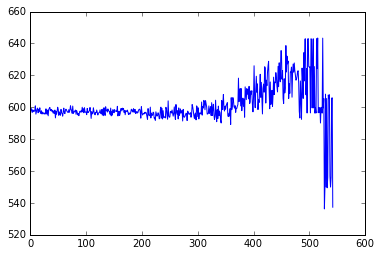

In [44]:
plt.plot(df[df['Sensor'] == "SensorMeasure2"]["Time"], df[df['Sensor'] == "SensorMeasure2"]["Mean"])
#plt.plot(df[df['Sensor'] == "SensorMeasure2"]["Time"], df[df['Sensor'] == "SensorMeasure2"]["Std"])

In [42]:
df[df['Sensor'] == "SensorMeasure2"][["Time", "Mean", "Std"]]

,Time,Mean,Std
4,1,596.855424,43.382262
28,2,599.097994,42.227541
52,3,598.555191,42.256726
76,4,596.811271,43.215444
100,5,598.201045,42.867346
124,6,597.462288,41.931142
148,7,597.409746,42.185304
172,8,598.170650,42.147384
196,9,600.881144,41.137882
220,10,595.695982,43.040663
